## The original image, and its associated caption (decoded from token IDs).

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))



In [2]:
import torch
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as F
from src.dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer

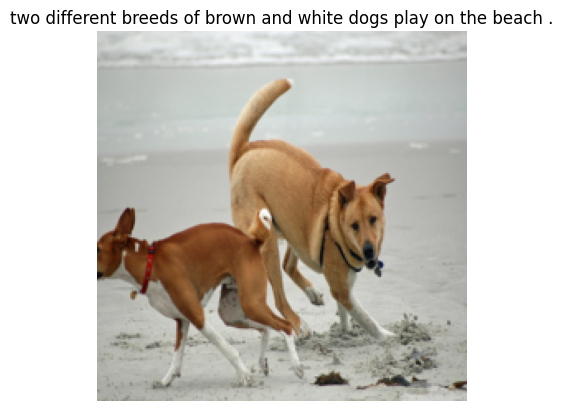

In [3]:


# Build vocab and dataset
import os
BASE_DIR = os.path.abspath("..")
CSV_PATH = os.path.join(BASE_DIR, "data", "Captions", "captions.txt")
IMG_PATH = os.path.join(BASE_DIR, "data", "Images")

vocab = build_vocab_from_captions(CSV_PATH)
my_tokenizer = MyTokenizer(vocab)
dataset = ImageCaptionDataset(
    csv_file=CSV_PATH,
    img_folder=IMG_PATH,
    tokenizer=my_tokenizer,
    transform=my_transforms
)


# Reverse vocab for decoding ids back to words
idx2word = {idx: word for word, idx in vocab['word2idx'].items()}

def decode_caption(caption_tensor):
    tokens = []
    for idx in caption_tensor:
        word = idx2word.get(idx.item(), "<unk>")
        if word == '<eos>':
            break
        if word != '<sos>' and word != '<pad>':
            tokens.append(word)
    return ' '.join(tokens)

# Pick an index
idx = 100  # or any random number in range(len(dataset))
image, caption_tensor = dataset[idx]

# Denormalize for displaying
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
image_display = image * std + mean  # unnormalize
image_display = F.to_pil_image(image_display)

# Show image and caption
plt.imshow(image_display)
plt.axis('off')
plt.title(decode_caption(caption_tensor))
plt.show()


### Grid of random samples

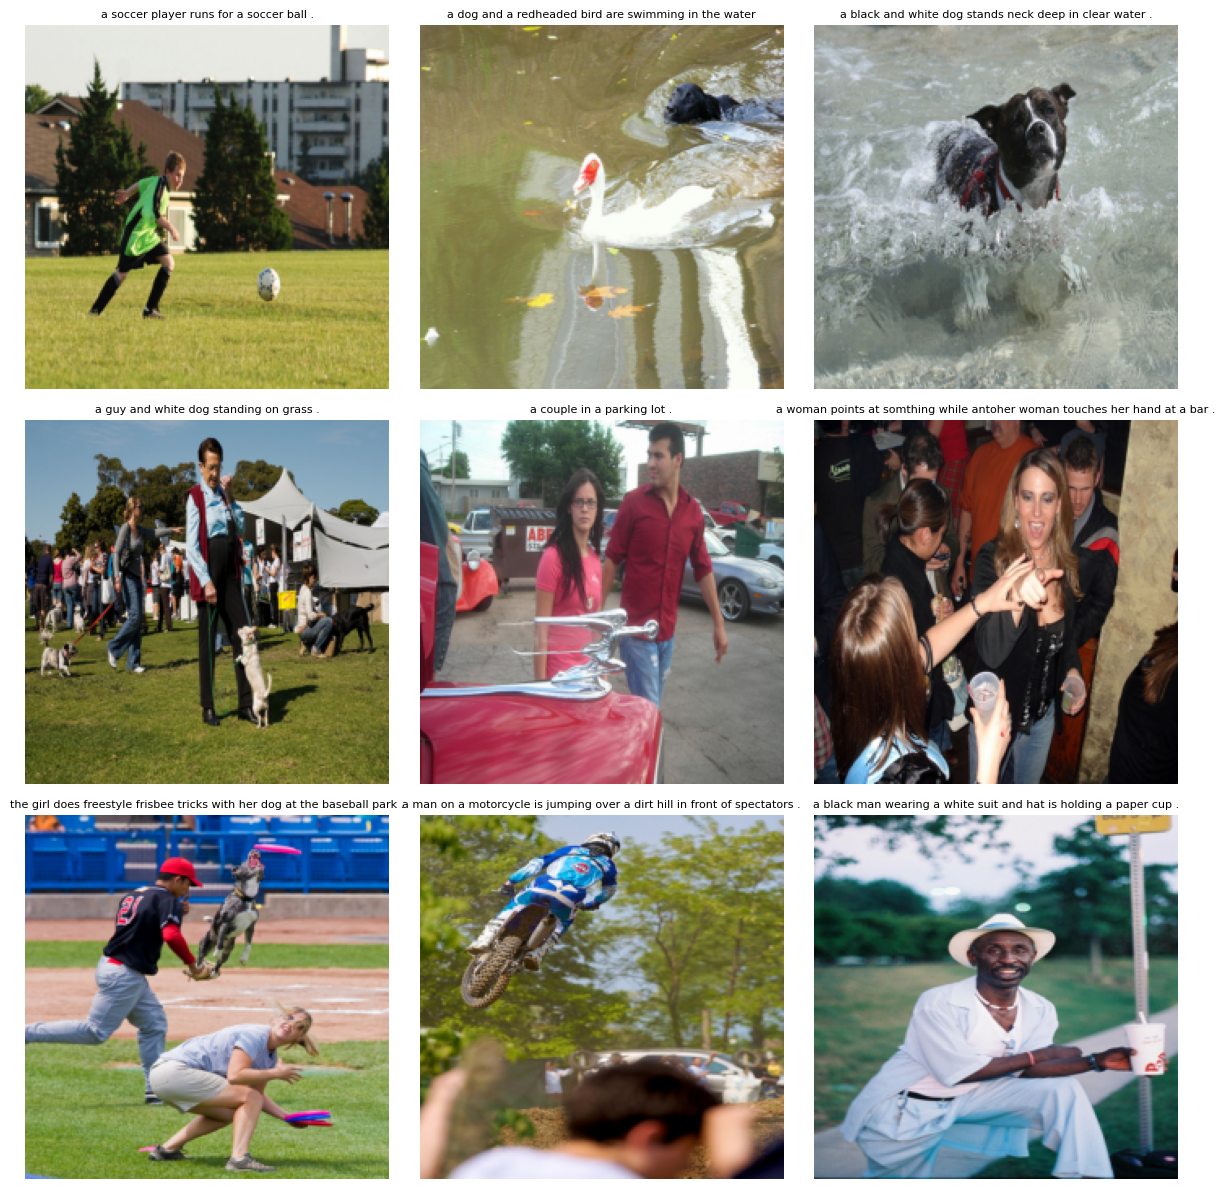

In [4]:
plt.figure(figsize=(12,12))
for i in range(9):
    idx = random.randint(0, len(dataset) - 1)
    image, caption_tensor = dataset[idx]
    image_display = image * std + mean
    image_display = F.to_pil_image(image_display)
    plt.subplot(3,3,i+1)
    plt.imshow(image_display)
    plt.axis('off')
    plt.title(decode_caption(caption_tensor), fontsize=8)
plt.tight_layout()
plt.show()


###  Plot  token frequency (EDA on vocab)

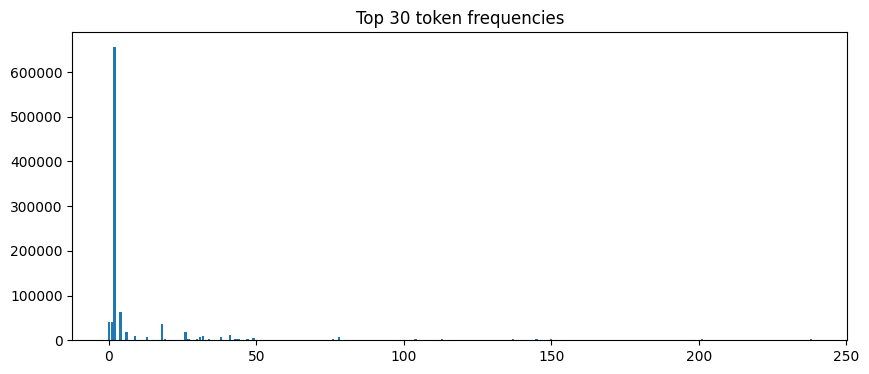

In [5]:
import collections
import matplotlib.pyplot as plt

counter = collections.Counter()
for idx in range(len(dataset)):
    _, caption_tensor = dataset[idx]
    for token_id in caption_tensor:
        counter[token_id.item()] += 1

plt.figure(figsize=(10,4))
plt.bar(*zip(*counter.most_common(30)))
plt.title("Top 30 token frequencies")
plt.show()


Text(0.5, 1.0, 'a girl dressed in black and white with mime makeup stands in the middle of a street with a white umbrella and black top hat in her hand')

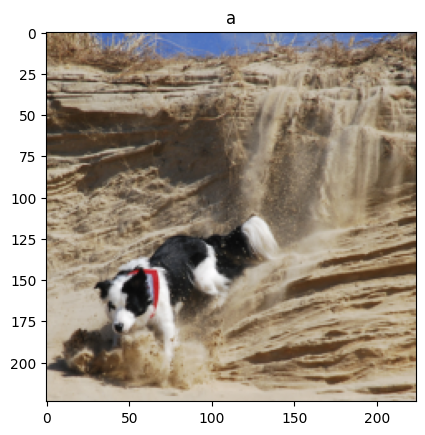

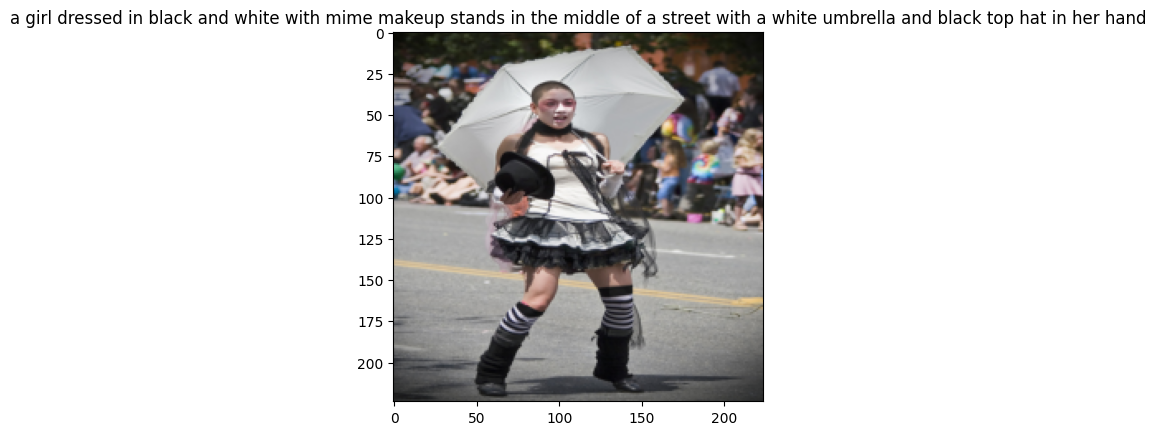

In [6]:
lengths = [ (idx, (caption_tensor != 2).sum().item()) for idx, (image, caption_tensor) in enumerate(dataset)]
lengths.sort(key=lambda x: x[1])

# shortest caption
short_idx, _ = lengths[0]
image, cap = dataset[short_idx]
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))

# longest caption
long_idx, _ = lengths[-1]
image, cap = dataset[long_idx]
plt.figure()
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))



## Implementing training loop 

In [7]:

import sys
sys.path.append('../src')  # adjust path if needed


In [ ]:
import importlib
import sys

# Remove cached modules
modules_to_reload = ['src.models', 'src.train', 'src.dataset', 'src.utils', 'models', 'train', 'dataset']
for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

# Enable autoreload for future changes
%reload_ext autoreload
%autoreload 2

In [9]:
from train import train_model

In [ ]:
# Fresh imports after module reload
from models import ImageCaptioningModel
from dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer
from train import train_model

print("✅ Modules imported successfully with updated signatures")

In [11]:
sys.path.append('../data')  # adjust path if needed

In [12]:
train_model(
    csv_path='../data/Captions/captions.txt',
    image_folder='../data/Images',
    epochs=10,
    batch_size=32,
    lr=1e-4,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    checkpoint_path='checkpoints/best_model.pt'
)

c:\Users\Lenovo\Desktop\image-captioning-transformer\imageenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\Desktop\image-captioning-transformer\imageenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:24<00:00, 4.11MB/s]
Epoch 1/10: 100%|██████████| 1265/1265 [08:01<00:00,  2.63it/s]


Epoch 1, Loss: 3.9961
✅ Saved best model with loss 3.9961 at checkpoints/best_model.pt


Epoch 2/10: 100%|██████████| 1265/1265 [11:02<00:00,  1.91it/s] 


Epoch 2, Loss: 3.1033
✅ Saved best model with loss 3.1033 at checkpoints/best_model.pt


Epoch 3/10: 100%|██████████| 1265/1265 [17:40<00:00,  1.19it/s]


Epoch 3, Loss: 2.7845
✅ Saved best model with loss 2.7845 at checkpoints/best_model.pt


Epoch 4/10: 100%|██████████| 1265/1265 [20:35<00:00,  1.02it/s]


Epoch 4, Loss: 2.5696
✅ Saved best model with loss 2.5696 at checkpoints/best_model.pt


Epoch 5/10: 100%|██████████| 1265/1265 [1:30:51<00:00,  4.31s/it]     


Epoch 5, Loss: 2.4009
✅ Saved best model with loss 2.4009 at checkpoints/best_model.pt


Epoch 6/10: 100%|██████████| 1265/1265 [15:48<00:00,  1.33it/s]


Epoch 6, Loss: 2.2605
✅ Saved best model with loss 2.2605 at checkpoints/best_model.pt


Epoch 7/10: 100%|██████████| 1265/1265 [15:37<00:00,  1.35it/s]


Epoch 7, Loss: 2.1352
✅ Saved best model with loss 2.1352 at checkpoints/best_model.pt


Epoch 8/10: 100%|██████████| 1265/1265 [13:26<00:00,  1.57it/s]


Epoch 8, Loss: 2.0223
✅ Saved best model with loss 2.0223 at checkpoints/best_model.pt


Epoch 9/10: 100%|██████████| 1265/1265 [08:45<00:00,  2.41it/s]


Epoch 9, Loss: 1.9206
✅ Saved best model with loss 1.9206 at checkpoints/best_model.pt


Epoch 10/10: 100%|██████████| 1265/1265 [10:27<00:00,  2.02it/s]


Epoch 10, Loss: 1.8242
✅ Saved best model with loss 1.8242 at checkpoints/best_model.pt
Training complete ✅


In [14]:
import os

# Check if file is found
print(os.getcwd())  # Shows your current working directory
print(os.path.exists('data/Captions/captions.txt'))  # Should return True
print(os.path.exists('../data/Captions/captions.txt'))  # Try this too


c:\Users\Lenovo\Desktop\image-captioning-transformer\notebooks
False
True


In [16]:
import pickle
# Save the vocabulary to a file
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = ImageCaptioningModel(
    vocab_size=len(vocab['word2idx']),
    embed_dim=256,
    num_heads=8,
    num_layers=3,
    max_len=30
).to(device)

model.load_state_dict(torch.load("../checkpoints/best_model.pt", map_location=device))
model.eval()

ImageCaptioningModel(
  (encoder_cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [25]:
from PIL import Image

def generate_caption(image_path, model, vocab, device, max_length=30):
    """Generate caption for an image using existing transforms"""
    # Use the same transforms from dataset.py
    image = Image.open(image_path).convert("RGB")
    image = my_transforms(image).unsqueeze(0).to(device)  # Use your existing my_transforms
    
    model.eval()
    
    # Get word2idx and idx2word mappings
    word2idx = vocab['word2idx']
    idx2word = {idx: word for word, idx in word2idx.items()}
    
    # Start with <sos> token
    caption_ids = [word2idx['<sos>']]
    
    with torch.no_grad():
        for _ in range(max_length):
            # Convert current caption to tensor
            current_caption = torch.tensor(caption_ids).unsqueeze(0).to(device)
            
            # Get model output
            outputs = model(image, current_caption)
            
            # Get the last predicted token
            next_token_logits = outputs[0, -1, :]
            next_token_id = torch.argmax(next_token_logits).item()
            
            # Add to caption
            caption_ids.append(next_token_id)
            
            # Stop if we hit <eos> token
            if next_token_id == word2idx.get('<eos>', -1):
                break
    
    # Convert IDs to words (skip <sos> and <eos>)
    words = []
    for idx in caption_ids[1:]:  # Skip <sos>
        word = idx2word.get(idx, '<unk>')
        if word == '<eos>':
            break
        if word not in ['<pad>', '<sos>']:
            words.append(word)
    
    return ' '.join(words)

Generated Caption: a brown dog with a red collar stands in the grass .


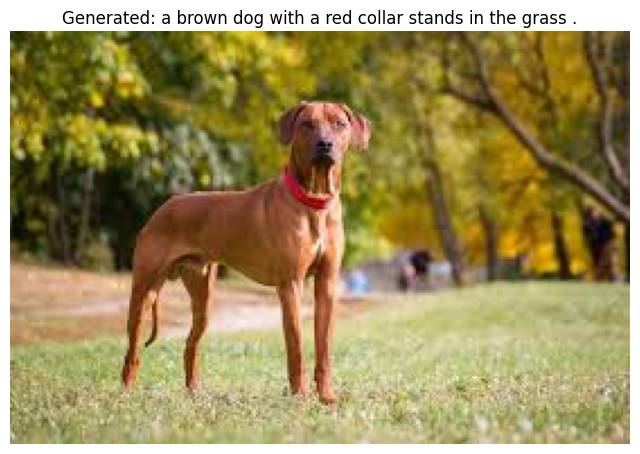

In [26]:
try:
    caption = generate_caption("../test_image/dog_test.jpg", model, vocab, device)
    print("Generated Caption:", caption)
    
    # Also show the image
    import matplotlib.pyplot as plt
    img = Image.open("../test_image/dog_test.jpg")
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Generated: {caption}")
    plt.show()
    
except Exception as e:
    print(f"Error generating caption: {e}")
    print("Make sure the model is loaded and the image path is correct")

## Model Evaluation with CIDEr Score

Now let's evaluate our trained model using the CIDEr metric, which is the standard evaluation metric for image captioning tasks.

In [36]:
# Import evaluation functions
import sys
sys.path.append('../src')
from direct_cider_eval import direct_cider_evaluation, show_examples, load_data

# Run CIDEr evaluation
print(" Running CIDEr evaluation...")
ref_json = "../references.json"
res_json = "../results.json"

# Check if evaluation files exist
import os
if not os.path.exists(ref_json) or not os.path.exists(res_json):
    print(" Evaluation files not found. Please run the generate_results.py script first.")
else:
    cider_score, cider_scores = direct_cider_evaluation(ref_json, res_json)

 Running CIDEr evaluation...
 Loading references and results...
 Processing 8091 images...
 Average references per image: 5.0
 Calculating CIDEr score...
 CIDER EVALUATION RESULTS
CIDEr Score: 1.3484

 Detailed Statistics:
Total images evaluated: 8091
Total reference captions: 40455
Average CIDEr per image: 1.3484
Min CIDEr score: 0.0000
Max CIDEr score: 6.3581
Std CIDEr score: 0.9221
 CIDER EVALUATION RESULTS
CIDEr Score: 1.3484

 Detailed Statistics:
Total images evaluated: 8091
Total reference captions: 40455
Average CIDEr per image: 1.3484
Min CIDEr score: 0.0000
Max CIDEr score: 6.3581
Std CIDEr score: 0.9221


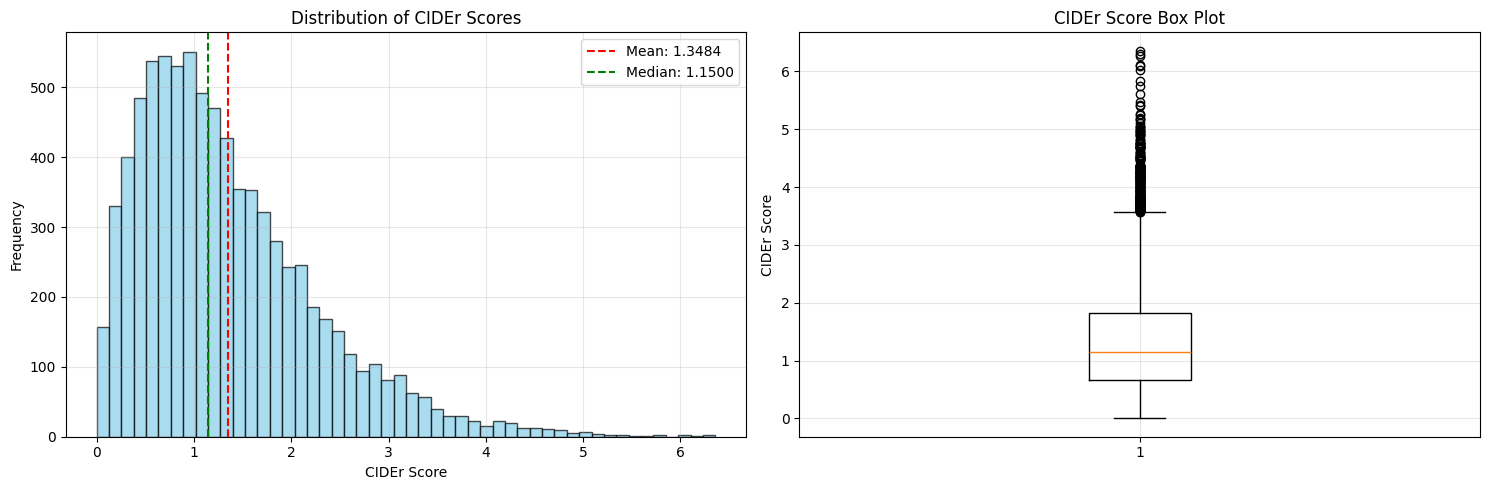

CIDEr Score Statistics:
Mean: 1.3484
Median: 1.1500
Std Dev: 0.9221
Min: 0.0000
Max: 6.3581
25th percentile: 0.6598
75th percentile: 1.8262


In [37]:
# Visualize CIDEr score distribution
if 'cider_scores' in locals() and cider_scores is not None:
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram of CIDEr scores
    ax1.hist(cider_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(np.mean(cider_scores), color='red', linestyle='--', 
                label=f'Mean: {np.mean(cider_scores):.4f}')
    ax1.axvline(np.median(cider_scores), color='green', linestyle='--', 
                label=f'Median: {np.median(cider_scores):.4f}')
    ax1.set_xlabel('CIDEr Score')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of CIDEr Scores')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot of CIDEr scores
    ax2.boxplot(cider_scores, vert=True)
    ax2.set_ylabel('CIDEr Score')
    ax2.set_title('CIDEr Score Box Plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"CIDEr Score Statistics:")
    print(f"Mean: {np.mean(cider_scores):.4f}")
    print(f"Median: {np.median(cider_scores):.4f}")
    print(f"Std Dev: {np.std(cider_scores):.4f}")
    print(f"Min: {np.min(cider_scores):.4f}")
    print(f"Max: {np.max(cider_scores):.4f}")
    print(f"25th percentile: {np.percentile(cider_scores, 25):.4f}")
    print(f"75th percentile: {np.percentile(cider_scores, 75):.4f}")
else:
    print("CIDEr scores not available. Please run the evaluation cell first.")

TOP 3 BEST PREDICTIONS


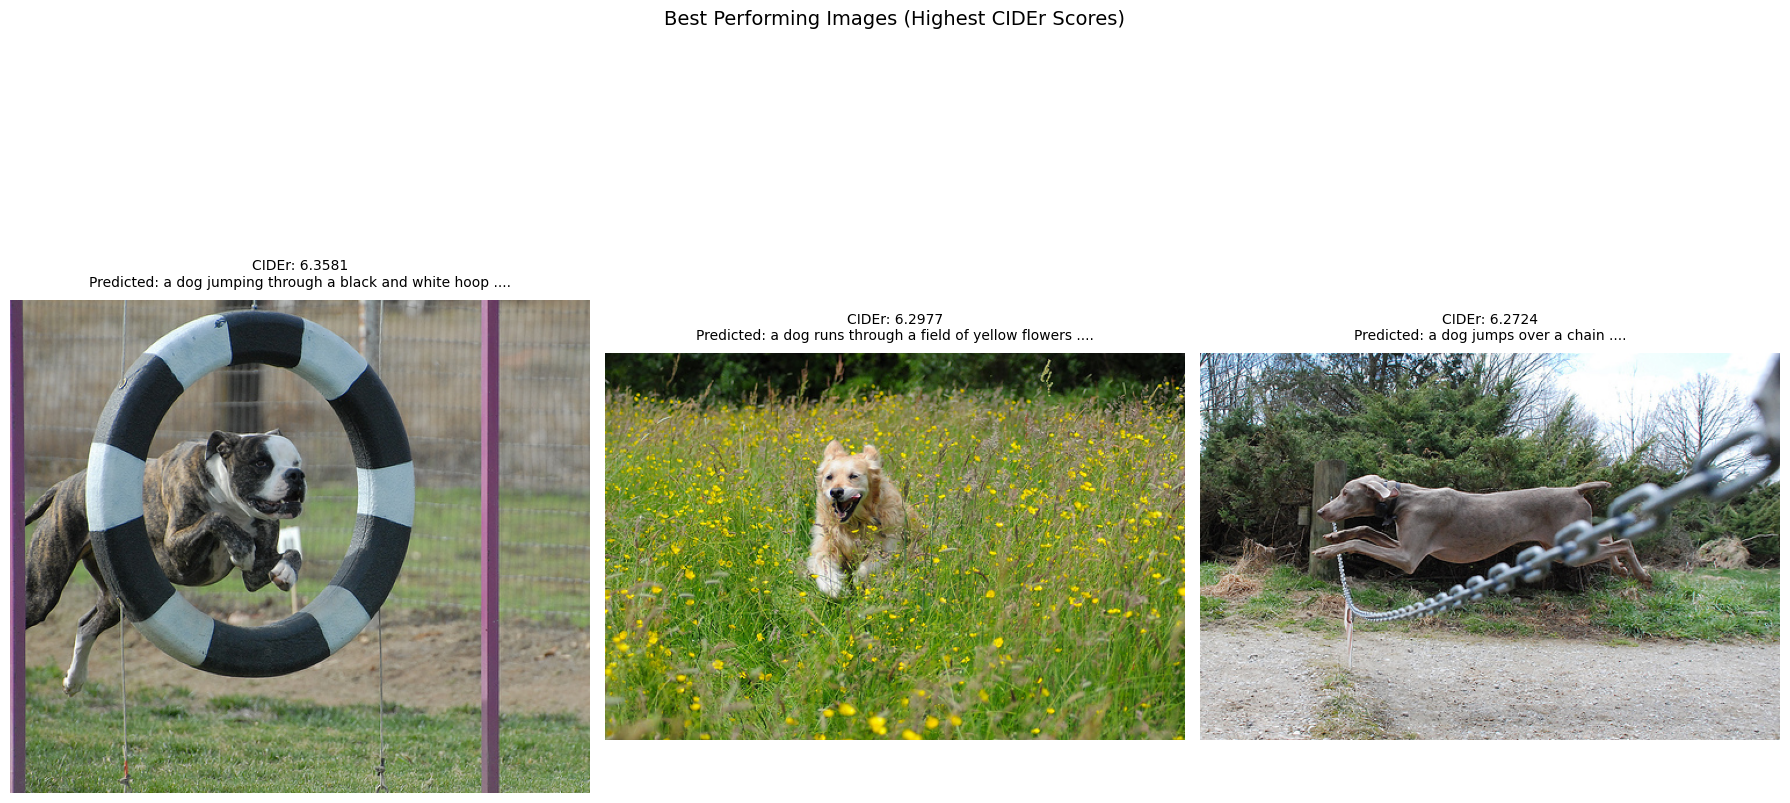


Ground Truth Captions for Best Predictions:

1. 1662261486_db967930de.jpg (CIDEr: 6.3581)
    Predicted: a dog jumping through a black and white hoop .
    Ground Truth:
      1. A black and white dog is jumping through a black and white hoop .
      2. A black and white dog jumps through a black and white hoop .
      3. A brown and white dog jumping through a black and white hoop .

2. 3654338683_13b2f95a9a.jpg (CIDEr: 6.2977)
    Predicted: a dog runs through a field of yellow flowers .
    Ground Truth:
      1. A dog runs through a grassy field of yellow flowers .
      2. a dog runs through the long grass .
      3. A golden retriever runs through a field of yellow flowers .

3. 465994762_1760e83c5d.jpg (CIDEr: 6.2724)
    Predicted: a dog jumps over a chain .
    Ground Truth:
      1. a brown dog jumps over a chain .
      2. A dog jumps over a chain .
      3. A dog leaping over a chain .


In [38]:
# Visualize best and worst predictions with actual images
if 'cider_scores' in locals() and cider_scores is not None:
    import json
    from PIL import Image
    import matplotlib.pyplot as plt
    
    # Load data
    with open(ref_json, 'r') as f:
        references = json.load(f)
    with open(res_json, 'r') as f:
        results = json.load(f)
    
    # Create mappings
    result_map = {r['image_id']: r['caption'] for r in results}
    image_map = {img['id']: img['file_name'] for img in references['images']}
    
    # Group annotations by image_id
    from collections import defaultdict
    image_annotations = defaultdict(list)
    for ann in references['annotations']:
        image_annotations[ann['image_id']].append(ann['caption'])
    
    # Get sorted examples
    imgIds = list(result_map.keys())
    score_pairs = [(img_id, cider_scores[i]) for i, img_id in enumerate(imgIds)]
    score_pairs.sort(key=lambda x: x[1], reverse=True)
    
    # Show top 3 best predictions with images
    print("TOP 3 BEST PREDICTIONS")
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    
    for i in range(3):
        img_id, score = score_pairs[i]
        img_name = image_map.get(img_id, f"image_{img_id}")
        img_path = f"../data/Images/{img_name}"
        
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            
            # Create title with prediction and score
            title = f"CIDEr: {score:.4f}\n"
            title += f"Predicted: {result_map[img_id][:50]}..."
            axes[i].set_title(title, fontsize=10, pad=10)
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Image not found\n{img_name}", 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.suptitle("Best Performing Images (Highest CIDEr Scores)", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Show ground truth for best predictions
    print("\nGround Truth Captions for Best Predictions:")
    for i in range(3):
        img_id, score = score_pairs[i]
        img_name = image_map.get(img_id, f"image_{img_id}")
        print(f"\n{i+1}. {img_name} (CIDEr: {score:.4f})")
        print(f"    Predicted: {result_map[img_id]}")
        print("    Ground Truth:")
        for j, gt in enumerate(image_annotations[img_id][:3]):
            print(f"      {j+1}. {gt}")
    
else:
    print(" CIDEr scores not available. Please run the evaluation cell first.")

 WORST 3 PREDICTIONS


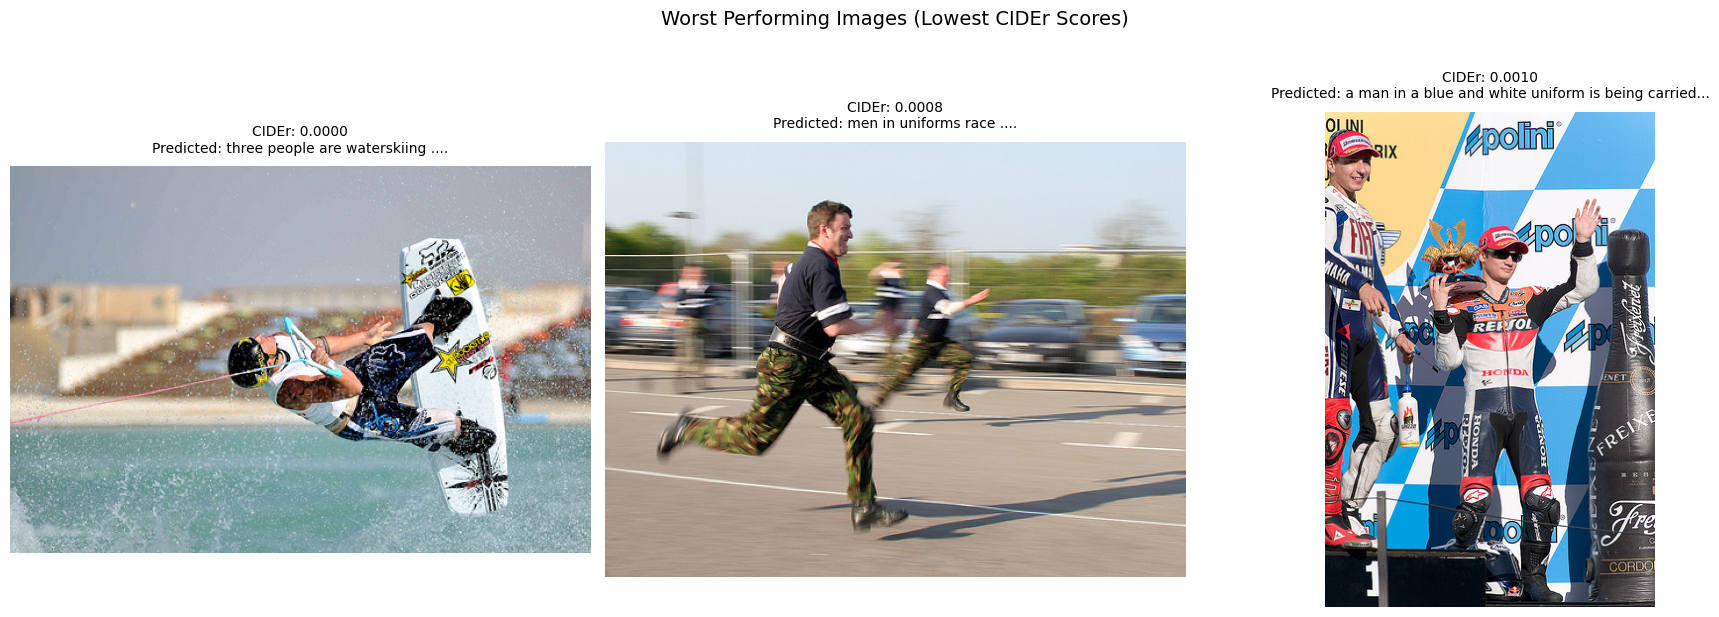


 Ground Truth Captions for Worst Predictions:

1. 2768248810_06d543c080.jpg (CIDEr: 0.0000)
    Predicted: three people are waterskiing .
    Ground Truth:
      1. A man , feet fastened to a board and holding a tow-rope becomes airborne over the water .
      2. A man water boarding .
      3. A man waterskis .

2. 3463268965_f22884fc69.jpg (CIDEr: 0.0008)
    Predicted: men in uniforms race .
    Ground Truth:
      1. A man in camo pants and a blue and white shirt running on a concrete surface with other men dressed the same running behind him .
      2. A man races another man in the background
      3. Men in camouflage pants racing across a parking lot .

3. 3491607076_922ec561d9.jpg (CIDEr: 0.0010)
    Predicted: a man in a blue and white uniform is being carried by a man in a blue and black uniform .
    Ground Truth:
      1. A man holds a trophy on the stage .
      2. A race car driver accepts his trophy .
      3. a racer holds up his trophy .


In [39]:
# Show worst predictions for analysis
if 'score_pairs' in locals():
    print(" WORST 3 PREDICTIONS")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i in range(3):
        img_id, score = score_pairs[-(i+1)]  # Get from the end (worst scores)
        img_name = image_map.get(img_id, f"image_{img_id}")
        img_path = f"../data/Images/{img_name}"
        
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            
            # Create title with prediction and score
            title = f"CIDEr: {score:.4f}\n"
            title += f"Predicted: {result_map[img_id][:50]}..."
            axes[i].set_title(title, fontsize=10, pad=10)
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Image not found\n{img_name}", 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.suptitle("Worst Performing Images (Lowest CIDEr Scores)", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Show ground truth for worst predictions
    print("\n Ground Truth Captions for Worst Predictions:")
    for i in range(3):
        img_id, score = score_pairs[-(i+1)]
        img_name = image_map.get(img_id, f"image_{img_id}")
        print(f"\n{i+1}. {img_name} (CIDEr: {score:.4f})")
        print(f"    Predicted: {result_map[img_id]}")
        print("    Ground Truth:")
        for j, gt in enumerate(image_annotations[img_id][:3]):
            print(f"      {j+1}. {gt}")
else:
    print(" Score pairs not available. Please run the previous cells first.")

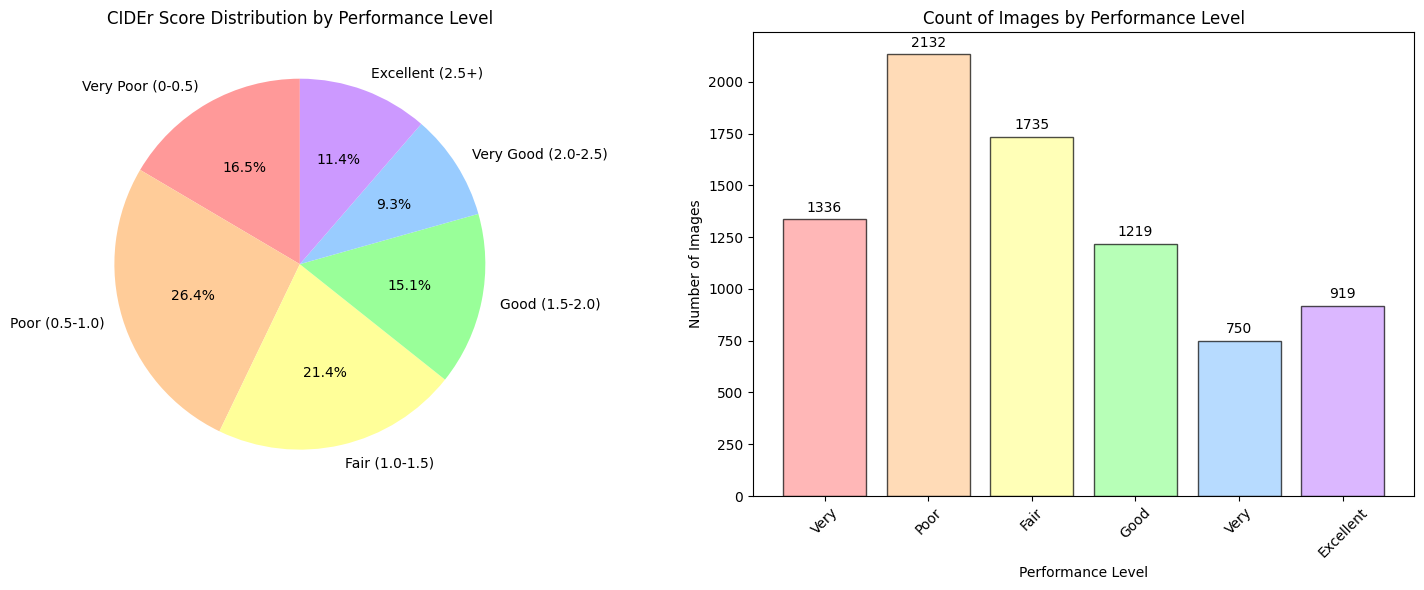

 Performance Breakdown:
Very Poor (0-0.5): 1336 images (16.5%)
Poor (0.5-1.0): 2132 images (26.4%)
Fair (1.0-1.5): 1735 images (21.4%)
Good (1.5-2.0): 1219 images (15.1%)
Very Good (2.0-2.5): 750 images (9.3%)
Excellent (2.5+): 919 images (11.4%)

 Model Performance Summary:
Total Images Evaluated: 8091
Overall CIDEr Score: 1.3484
Performance Rating: Good 


In [40]:
# Performance Analysis and Score Breakdown
if 'cider_scores' in locals() and cider_scores is not None:
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create score bins for analysis
    bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, float('inf')]
    labels = ['Very Poor (0-0.5)', 'Poor (0.5-1.0)', 'Fair (1.0-1.5)', 
              'Good (1.5-2.0)', 'Very Good (2.0-2.5)', 'Excellent (2.5+)']
    
    # Count scores in each bin
    counts = []
    for i in range(len(bins)-1):
        if i == len(bins)-2:  # Last bin
            count = sum(1 for score in cider_scores if score >= bins[i])
        else:
            count = sum(1 for score in cider_scores if bins[i] <= score < bins[i+1])
        counts.append(count)
    
    # Create performance breakdown pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Pie chart
    colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff', '#cc99ff']
    wedges, texts, autotexts = ax1.pie(counts, labels=labels, autopct='%1.1f%%', 
                                       colors=colors, startangle=90)
    ax1.set_title('CIDEr Score Distribution by Performance Level')
    
    # Bar chart
    ax2.bar(range(len(labels)), counts, color=colors, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Performance Level')
    ax2.set_ylabel('Number of Images')
    ax2.set_title('Count of Images by Performance Level')
    ax2.set_xticks(range(len(labels)))
    ax2.set_xticklabels([label.split(' ')[0] for label in labels], rotation=45)
    
    # Add count labels on bars
    for i, count in enumerate(counts):
        ax2.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed breakdown
    print(" Performance Breakdown:")
    for i, (label, count) in enumerate(zip(labels, counts)):
        percentage = (count / len(cider_scores)) * 100
        print(f"{label}: {count} images ({percentage:.1f}%)")
    
    print(f"\n Model Performance Summary:")
    print(f"Total Images Evaluated: {len(cider_scores)}")
    print(f"Overall CIDEr Score: {np.mean(cider_scores):.4f}")
    
    # Performance rating based on CIDEr score
    avg_score = np.mean(cider_scores)
    if avg_score >= 2.0:
        rating = "Excellent "
    elif avg_score >= 1.5:
        rating = "Very Good "
    elif avg_score >= 1.0:
        rating = "Good "
    elif avg_score >= 0.5:
        rating = "Fair "
    else:
        rating = "Needs Improvement "
    
    print(f"Performance Rating: {rating}")
    
else:
    print(" CIDEr scores not available. Please run the evaluation cell first.")

🔍 Random Sample Predictions (Manual Inspection)

 Image 1: 2423292784_166ee54e0b.jpg
 CIDEr Score: 0.5203
 Model Prediction: a boy with a mohawk on his head is holding a piece of metal bar .
 Ground Truth Options:
   1. A boy with a metal colander on his head .
   2. A little boy clowns with a colander on his head .
   3. A mad boy who has a bowl on his head .
------------------------------------------------------------

 Image 2: 2439384468_58934deab6.jpg
 CIDEr Score: 2.1958
 Model Prediction: two black and brown dogs are running through a field .
 Ground Truth Options:
   1. Two black and brown dobermans running in a field playing ball .
   2. Two black and brown dogs are running through a field .
   3. Two doberman 's run through a field while one of them holds a tennis ball in its mouth .
------------------------------------------------------------

 Image 3: 2921430836_3b4d062238.jpg
 CIDEr Score: 0.7877
 Model Prediction: a group of football players are playing football .
 Groun

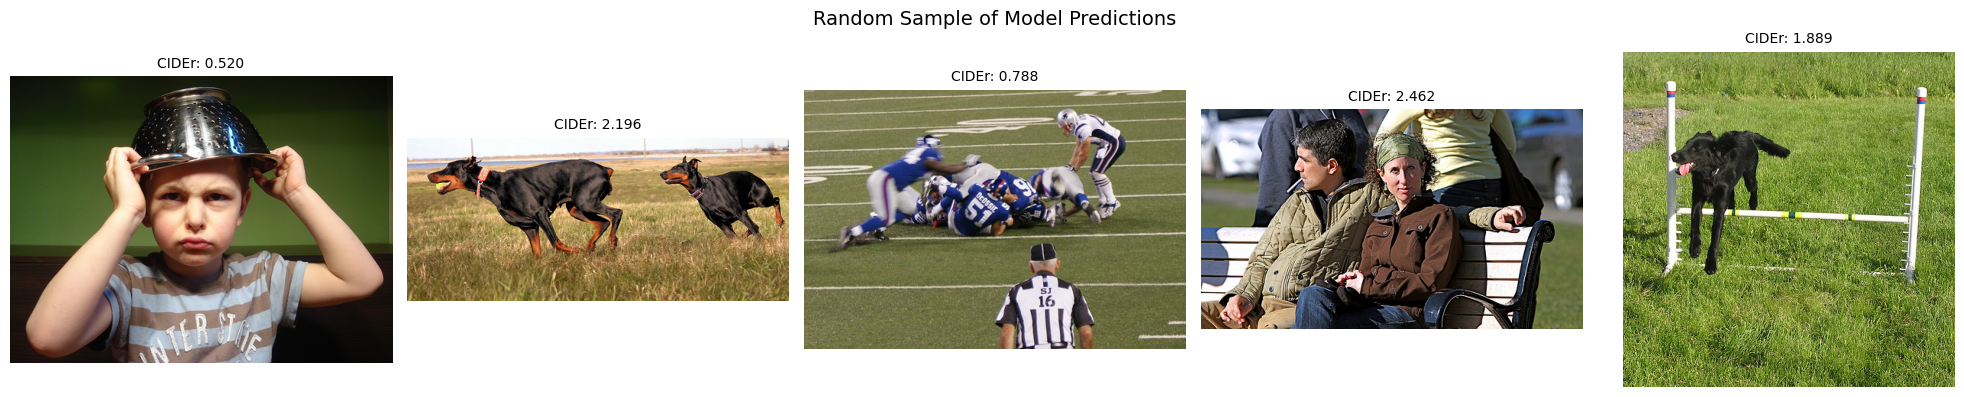

In [41]:
# Sample Random Predictions for Manual Inspection
if 'result_map' in locals() and 'image_annotations' in locals():
    print("🔍 Random Sample Predictions (Manual Inspection)")
    print("="*80)
    
    # Select 5 random images
    import random
    random_indices = random.sample(range(len(score_pairs)), 5)
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    for i, idx in enumerate(random_indices):
        img_id, score = score_pairs[idx]
        img_name = image_map.get(img_id, f"image_{img_id}")
        img_path = f"../data/Images/{img_name}"
        
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"CIDEr: {score:.3f}", fontsize=10)
            
            print(f"\n Image {i+1}: {img_name}")
            print(f" CIDEr Score: {score:.4f}")
            print(f" Model Prediction: {result_map[img_id]}")
            print(" Ground Truth Options:")
            for j, gt in enumerate(image_annotations[img_id][:3]):
                print(f"   {j+1}. {gt}")
            print("-" * 60)
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Image\nnot found", 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.suptitle("Random Sample of Model Predictions", fontsize=14)
    plt.tight_layout()
    plt.show()
    
else:
    print(" Data not available. Please run the previous evaluation cells first.")